# 필기체 숫자 이미지를 분류해보자

In [40]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# 1. 데이터 세트 읽어들이기

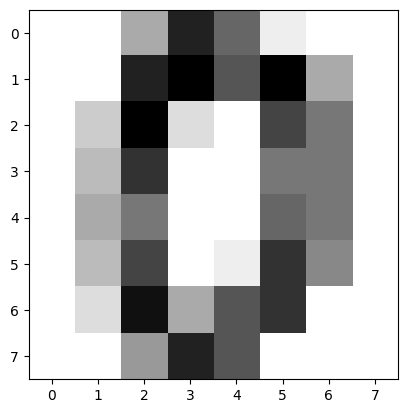

In [41]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

# 2. 데이터 평탄화 : 2차원 배열을 1차원으로 변경

In [42]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 3. 훈련 데이터와 테스트 데이터

In [43]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2)

# 원-핫 인코딩

In [65]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

In [45]:
X_train.shape[1]

64

In [46]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(64,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(learning_rate=0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\황주신\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986 (74.16 KB)

 Trainable params: 18,986 (74.16 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.8549e-05 - val_accuracy: 0.9889 - val_loss: 0.0779
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8982e-05 - val_accuracy: 0.9889 - val_loss: 0.0784
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4160e-05 - val_accuracy: 0.9889 - val_loss: 0.0788
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4345e-05 - val_accuracy: 0.9889 - val_loss: 0.0792
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3596e-05 - val_accuracy: 0.9889 - val_loss: 0.0797
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4852e-05 - val_accuracy: 0.9889 - val_loss: 0.0801
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4836e-05 - val_accuracy: 0.9889 - val_loss: 0.0807
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.1809e-05 - 

In [74]:
# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values


360

In [76]:
# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.9888888888888889
